In [99]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import normalize, to_categorical

In [33]:
home = os.path.expanduser('~')

In [34]:
img_path1 = os.path.join(home, 'Downloads/annotations/trimaps/Abyssinian_1.png')
img_path2 = os.path.join(home, 'Downloads/annotations/trimaps/Abyssinian_50.png')

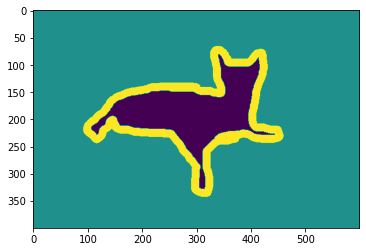

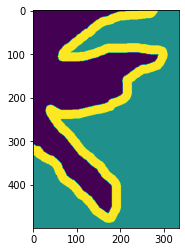

In [48]:
img1 = plt.imread(img_path1)
plt.imshow(img1)
plt.show()

img2 = plt.imread(img_path2)
plt.imshow(img2)
plt.show()

In [49]:
img1 = np.round(img1, 6)
np.unique(img1)

array([0.003922, 0.007843, 0.011765], dtype=float32)

In [50]:
ints = [0.003922, 0.007843, 0.011765]
for i in range(len(ints)):
    img1 = np.where(img1 == ints[i], i, img1)

In [51]:
np.unique(img1)

array([0., 1., 2.], dtype=float32)

In [52]:
img1 = np.array([img1])

In [53]:
img1.shape

(1, 400, 600)

In [54]:
train_mask = np.expand_dims(img1, axis=3)

In [55]:
train_mask.shape

(1, 400, 600, 1)

In [56]:
train_mask.dtype

dtype('float32')

In [57]:
train_mask = train_mask.astype('float64')

In [58]:
from tensorflow.keras.utils import to_categorical

In [59]:
train_mask_cat = to_categorical(train_mask, num_classes=3)

In [60]:
train_mask_cat.shape

(1, 400, 600, 3)

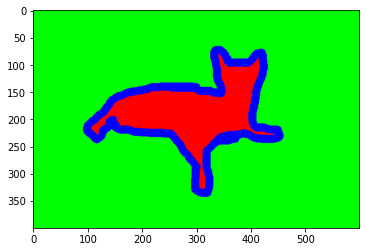

In [61]:
plt.imshow(train_mask_cat[0])
plt.show()

In [31]:
train_mask_cat[0,:,:,2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
img = np.random.randint(1, 4, size=(256,256))
img = np.expand_dims(img, axis=2)

In [11]:
img.shape

(256, 256, 1)

In [12]:
np.unique(img)

array([1, 2, 3])

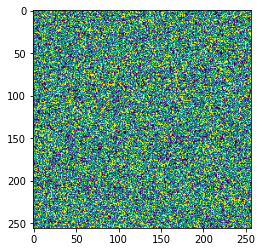

In [13]:
plt.imshow(img)

In [91]:
imgs = np.zeros((5, 256,256))

for i in range(len(imgs)):
    thresh = np.random.randint(30, 125)
    imgs[i,:thresh,:] = 0
    imgs[i,thresh:2*thresh] = 1
    imgs[i,2*thresh:,:] = 2
    
print(imgs.shape)
print(np.unique(imgs), imgs.dtype)
print(np.unique(imgs[0]), imgs.dtype)

(5, 256, 256)
[0. 1. 2.] float64
[0. 1. 2.] float64


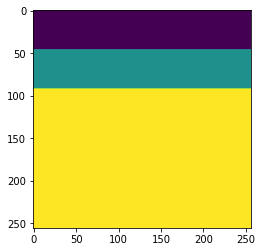

In [92]:
plt.imshow(imgs[1])
plt.show()

In [93]:
n, h, w = imgs.shape

In [94]:
imgs_reshaped = imgs.reshape(-1)
print(imgs_reshaped.shape)

(327680,)


In [95]:
labelencoder = LabelEncoder()
imgs_reshaped_encoded = labelencoder.fit_transform(imgs_reshaped)

In [96]:
final_imgs = imgs_reshaped_encoded.reshape(n,h,w)

In [97]:
final_imgs.shape

(5, 256, 256)

In [98]:
a = final_imgs[0]
print(np.unique(a), a.dtype)

[0 1 2] int64


In [100]:
ff_imgs = to_categorical(final_imgs, num_classes=3)

In [111]:
print(ff_imgs.shape)
print(ff_imgs.dtype)

(5, 256, 256, 3)
float32


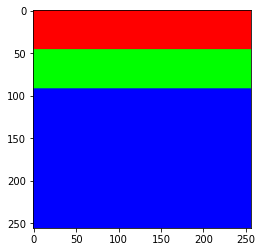

In [107]:
plt.imshow(ff_imgs[1])
plt.show()

[0. 1.] float32


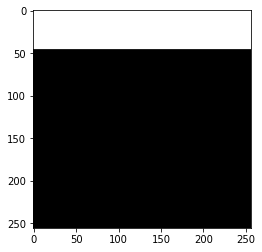

[0. 1.] float32


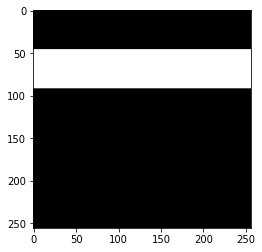

[0. 1.] float32


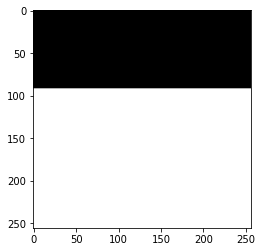

In [113]:
for i in range(ff_imgs.shape[-1]):
    temp = ff_imgs[1,:,:,i]
    print(np.unique(temp), temp.dtype)
    plt.imshow(ff_imgs[1,:,:,i], cmap='gray')
    plt.show()